In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./data/HR.csv")

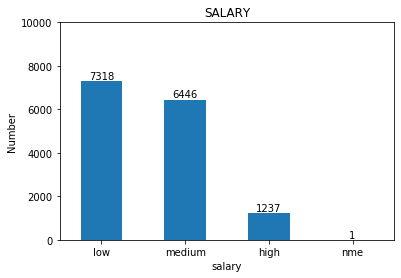

In [15]:
# 绘制柱状图
plt.title("SALARY")
plt.xlabel('salary')
plt.ylabel('Number')
# 显示x轴的标注 low、medium、high  向右平移0.5是为了让图像显示在中间位置
plt.xticks(np.arange(len(df['salary'].value_counts()))+0.5, df['salary'].value_counts().index)
# 控制x的最大值和最小值
#         x1 x2 y1  y2
plt.axis([0, 4, 0, 10000])
plt.bar(np.arange(len(df['salary'].value_counts()))+0.5, df['salary'].value_counts(), width=0.5)
# 将y的数字显示在图像上 使用zip函数，ha水平位置，va垂直位置
for x, y in zip(np.arange(len(df['salary'].value_counts()))+0.5, df['salary'].value_counts()):
    plt.text(x, y, y, ha='center', va='bottom')

### seaborn

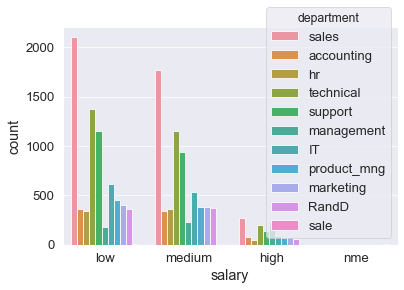

In [23]:
# 添加样式
sns.set_style(style='darkgrid')
# 添加字体 font_scale 倍数
sns.set_context(context='paper', font_scale=1.5)
# 添加颜色
sns.set_palette(sns.color_palette('RdBu', n_colors=7))
# 画图 多层次绘制 hue
sns.countplot(x='salary', hue='department', data=df)


# # 绘制柱状图
# plt.title("SALARY")
# plt.xlabel('salary')
# plt.ylabel('Number')
# # 显示x轴的标注 low、medium、high  向右平移0.5是为了让图像显示在中间位置
# plt.xticks(np.arange(len(df['salary'].value_counts()))+0.5, df['salary'].value_counts().index)
# # 控制x的最大值和最小值
# #         x1 x2 y1  y2
# plt.axis([0, 4, 0, 10000])
# plt.bar(np.arange(len(df['salary'].value_counts()))+0.5, df['salary'].value_counts(), width=0.5)
# # 将y的数字显示在图像上 使用zip函数，ha水平位置，va垂直位置
# for x, y in zip(np.arange(len(df['salary'].value_counts()))+0.5, df['salary'].value_counts()):
#     plt.text(x, y, y, ha='center', va='bottom')

## 直方图

/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


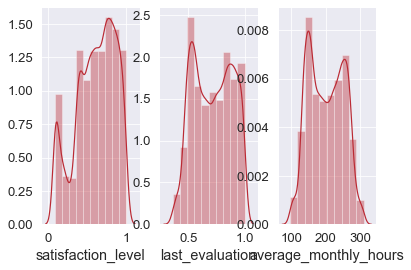

In [30]:
# 去除异常值
df = df[df<df.quantile(0.75)+1.5*(df.quantile(0.75)-df.quantile(0.25))][df>df.quantile(0.25)-1.5*(df.quantile(0.75)-df.quantile(0.25))]
# 创建figure
f = plt.figure()
f.add_subplot(1, 3, 1)
# 绘制图形 kde密度图  hist直方图
sns.distplot(df['satisfaction_level'], bins=10, hist=True)
# 图二
f.add_subplot(1, 3, 2)
sns.distplot(df['last_evaluation'], bins=10)
# 图三
f.add_subplot(1, 3, 3)
sns.distplot(df['average_monthly_hours'], bins=10)


## 箱线图

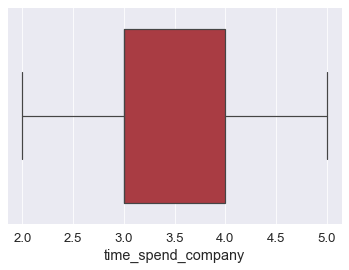

In [32]:
# 可以非常清晰的区分正常值和异常值
# saturation 圈定了方框的边界
# whis上分位数再向上几倍的分位数间距，才是它的上界 四分位数的 k 就是 whis
# 
sns.boxplot(x=df['time_spend_company'], saturation=0.75, whis=3)

## 折线图

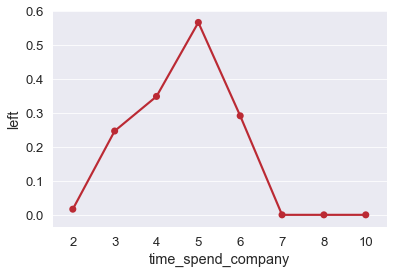

In [36]:
# 一般用来表示数据变化的趋势
# 观察员工在公司待的时间为其离职率的关系
# 按照工龄分组
df = pd.read_csv("./data/HR.csv")
sub_df = df.groupby('time_spend_company').mean()
sns.pointplot(sub_df.index, sub_df['left'])

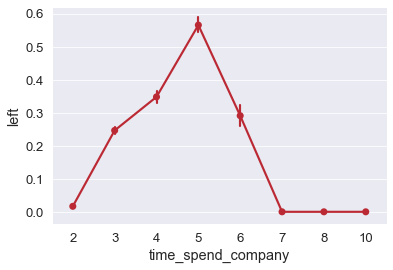

In [37]:
# 方法二
sns.pointplot(x='time_spend_company', y='left', data=df)

## 饼图

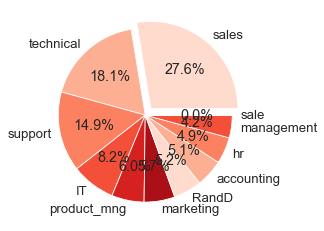

In [45]:
# 主要用来做结构分析
# 添加label
lbs = df['department'].value_counts().index
# 着重强调
explodes = [0.1 if i ==  "sales" else 0 for i in lbs]
# autopct 添加数字
plt.pie(df['department'].value_counts(normalize=True), explode=explodes, labels=lbs, autopct='%1.1f%%', colors=sns.color_palette("Reds"))
plt.show()